# Worksheet 20

Name:  Haokun Wu
UID: U18377013

### Topics

- Gradient Descent

## Gradient Descent

Recall in Linear Regression we are trying to find the line $$y = X \beta$$ that minimizes the sum of square distances between the predicted `y` and the `y` we observed in our dataset:

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2$$

We were able to find a global minimum to this loss function but we will try to apply gradient descent to find that same solution.

a) Implement the `loss` function to complete the code and plot the loss as a function of beta.

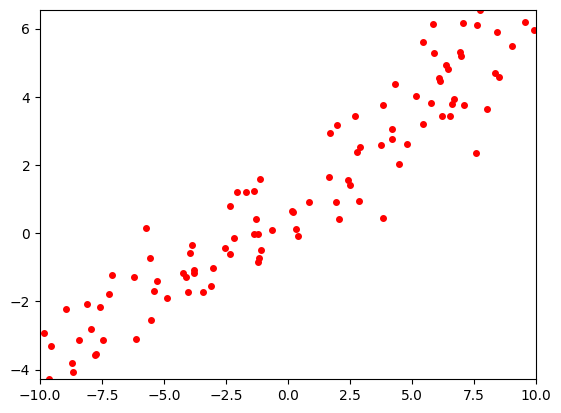

In [3]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Given parameters for the true line
beta = np.array([1, .5])
xlin = -10.0 + 20.0 * np.random.random(100)
X = np.column_stack([np.ones((len(xlin), 1)), xlin])
y = beta[0] + (beta[1] * xlin) + np.random.randn(100)

# Plotting the data
fig, ax = plt.subplots()
ax.plot(xlin, y, 'ro', markersize=4)
ax.set_xlim(-10, 10)
ax.set_ylim(min(y), max(y))
plt.show()


<Axes3D: xlabel='$\\beta_0$'>

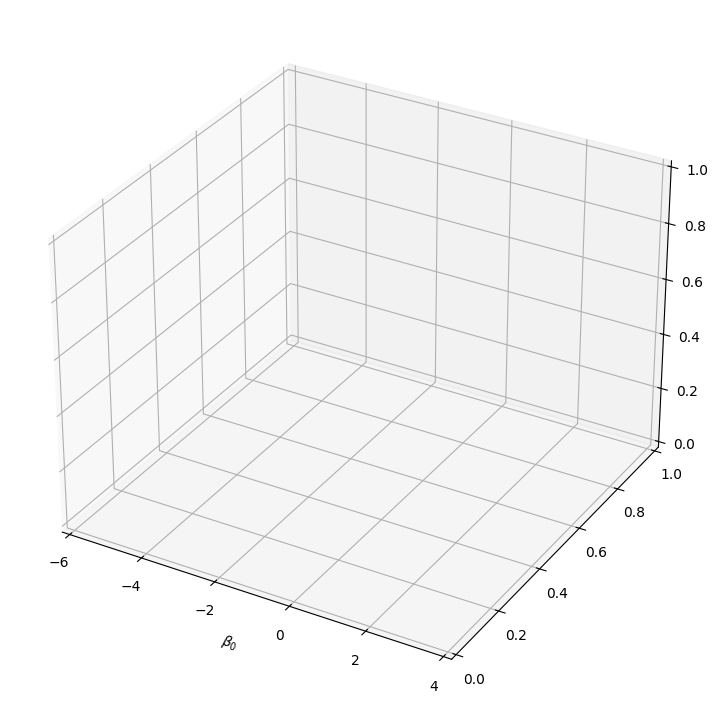

In [4]:
# Define the loss function as the sum of squared residuals
def loss(X, y, beta):
    predictions = X @ beta
    residuals = y - predictions
    return np.sum(residuals ** 2)

# Grid for \beta_0 and \beta_1
b0 = np.arange(-5, 4, 0.1)
b1 = np.arange(-5, 4, 0.1)
b0, b1 = np.meshgrid(b0, b1)

# Function to compute the cost for each pair of (\beta_0, \beta_1)
def get_cost(B0, B1, X, y):
    res = []
    for b0, b1 in zip(np.ravel(B0), np.ravel(B1)):
        beta = np.array([b0, b1])
        res.append(loss(X, y, beta))
    return np.array(res).reshape(B0.shape)

# Calculate the cost over the grid
cost = get_cost(b0, b1, X, y)
 
# Creating the 3D figure for the loss surface
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-6, 4)
ax.set_xlabel(r'$\beta_0$')
ax


Since the loss is

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2 = \beta^T X^T X \beta - 2\mathbf{\beta}^TX^T\mathbf{y}  + \mathbf{y}^T\mathbf{y}$$

The gradient is

$$\nabla_\beta \mathcal{L}(\mathbf{\beta}) = 2X^T X \beta - 2X^T\mathbf{y}$$

b) Implement the gradient function below and complete the gradient descent algorithm

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/temp.png'

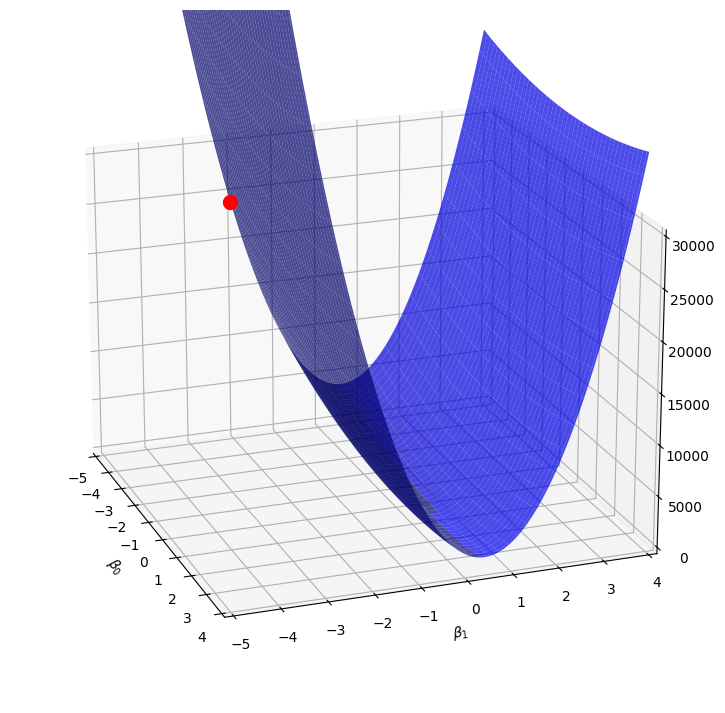

In [5]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "/mnt/data/temp.png"

# Define the loss function as the sum of squared residuals
def loss(X, y, beta):
    predictions = X @ beta
    residuals = y - predictions
    return np.sum(residuals ** 2)

# Gradient of the loss function with respect to beta
def gradient(X, y, beta):
    return -2 * X.T @ (y - X @ beta)

# Gradient descent algorithm implementation
def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        # Update rule for gradient descent
        grad = gradient(X, y, beta_hat)
        beta_hat = beta_hat - learning_rate * grad

        # Record the loss and beta values
        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)

# Visualization helper function
def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.set_xlim(-5, 4)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-5, 4)
    ax.set_zlim(0, 30000)

    # Creating plot
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.open(TEMPFILE)

# Define the initial beta, learning rate, and the number of epochs
beta_start = np.array([-5, -2])
learning_rate = 0.0002 # This is a hyperparameter that can be tuned
epochs = 10

# List to store snapshots of the gradient descent progress
images = []

# Perform gradient descent
betas, losses = gradient_descent(X, y, beta_start, learning_rate, epochs, images)

# Save the gradient descent process as a GIF
gif_path = "/mnt/data/gd.gif"
images[0].save(
    gif_path,
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

# Return the path to the saved GIF
gif_path


c) Use the code above to create an animation of the linear model learned at every epoch.

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/temp.png'

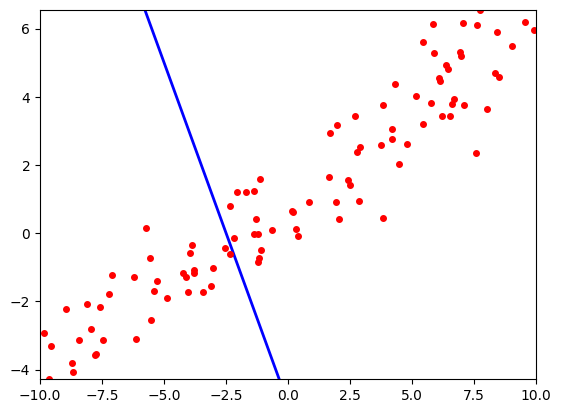

In [6]:
# Define the function to take a snapshot of the linear model at each epoch
def snap_model(beta):
    xplot = np.linspace(-10, 10, 50)
    yestplot = beta[0] + beta[1] * xplot
    fig, ax = plt.subplots()
    ax.plot(xplot, yestplot, 'b-', lw=2)
    ax.plot(xlin, y, 'ro', markersize=4)
    ax.set_xlim(-10, 10)
    ax.set_ylim(min(y), max(y))
    fig.savefig(TEMPFILE)
    plt.close()
    return im.open(TEMPFILE)

# Redefine the gradient descent function to include snapshots of the model
def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        # Append the current model to the images
        images.append(snap_model(beta_hat))
        # Update the beta_hat for the next epoch
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        # Record the loss and beta values
        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)

# Initialize parameters
images = []
beta_start = np.array([-5, -2])
learning_rate = 0.0002
epochs = 100

# Perform gradient descent and capture the model snapshots
betas, losses = gradient_descent(X, y, beta_start, learning_rate, epochs, images)

# Save the snapshots as a GIF
model_gif_path = "/mnt/data/model.gif"
images[0].save(
    model_gif_path,
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)

# Return the path to the saved GIF
model_gif_path


In logistic regression, the `loss` is the negative log-likelihood

$$ \mathcal{l}(\mathbf{\beta}) = - \frac{1}{N} \sum_{i=1}^{N} y_i \log(\sigma(x_i \beta)) + (1 - y_i)\log(1 - \sigma(x_i \beta))$$

the gradient of which is:

$$\nabla_\beta \mathcal{l}(\mathbf{\beta}) = \frac{1}{N} \sum_{i=1}^{N} x_i (y_i - \sigma(x_i \beta)) $$

d) Plot the loss as a function of b.

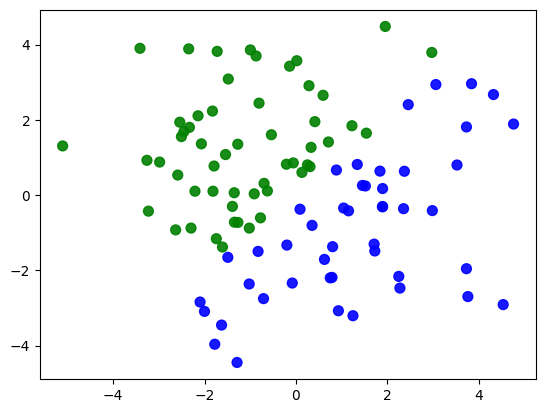

In [8]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=100, centers=centers, cluster_std=2, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = t
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

X, y = generate_line_data()

cs = np.array([x for x in 'gb'])
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=cs[y].tolist(), s=50, alpha=0.9)
plt.show()


In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss(X, y, beta):
    predictions = sigmoid(X @ beta)
    return -np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

# Function to compute the cost over a grid of beta values
def get_cost(B0, B1, X, y):
    res = []
    for b0, b1 in zip(np.ravel(B0), np.ravel(B1)):
        beta = np.array([b0, b1])
        res.append(loss(X, y, beta))
    return np.array(res).reshape(B0.shape)

# Set up the beta grid
b0 = np.arange(-20, 20, 0.1)
b1 = np.arange(-20, 20, 0.1)
b0, b1 = np.meshgrid(b0, b1)

# Augment X with a column of ones to account for the intercept term
X_augmented = np.column_stack((np.ones(X.shape[0]), X))

# Calculate the cost over the grid
cost = get_cost(b0, b1, X_augmented, y)

# Creating the figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-20, 20)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-20, 20)
ax.set_zlim(0, np.max(cost))

# Creating the plot
ax.plot_surface(b0, b1, cost, alpha=.7)

# Show the plot
plt.show()


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

e) Plot the loss at each iteration of the gradient descent algorithm.

/var/folders/kq/zy3gsq3d4y11t8kwl308dffh0000gn/T/ipykernel_35520/2718294402.py:6: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
/var/folders/kq/zy3gsq3d4y11t8kwl308dffh0000gn/T/ipykernel_35520/2718294402.py:6: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


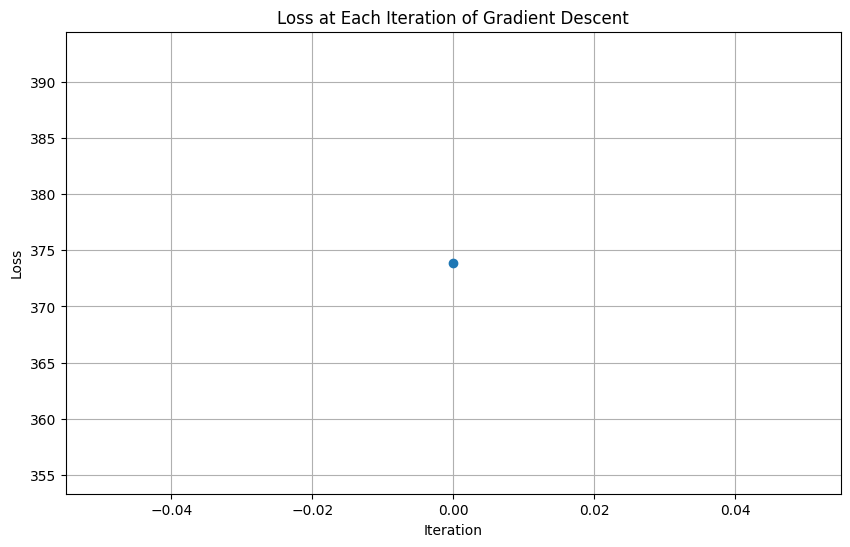

In [11]:
# Implement the gradient descent algorithm and plot the loss at each iteration
def gradient_descent(X, y, beta_hat, learning_rate, epochs):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        # Update beta_hat based on the gradient
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)
        # Record the updated beta_hat and the loss
        betas.append(beta_hat)
        current_loss = loss(X, y, beta_hat)
        losses.append(current_loss)
        
    return np.array(betas), np.array(losses)

# Redefine the gradient function according to logistic regression
def gradient(X, y, beta):
    preds = sigmoid(X @ beta)
    return X.T @ (preds - y)

# Run the gradient descent algorithm
beta_start = np.array([-5, -2, 0])  # Adjusted for two features plus intercept
learning_rate = 0.1  # Learning rate
epochs = 10  # Number of iterations

betas, losses = gradient_descent(X_augmented, y, beta_start, learning_rate, epochs)

# Plot the loss at each iteration
plt.figure(figsize=(10, 6))
plt.plot(losses, marker='o')
plt.title('Loss at Each Iteration of Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


f) Create an animation of the logistic regression fit at every epoch.

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/temp.png'

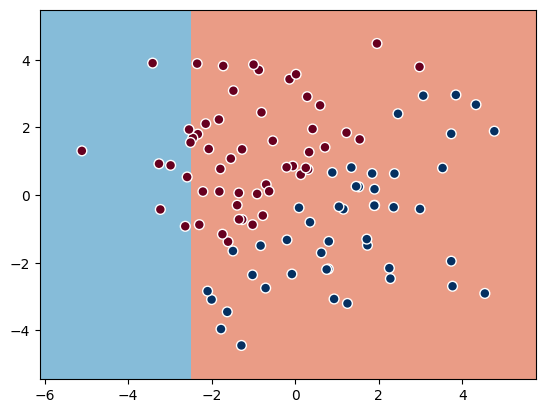

In [12]:
# Define the function to create a snapshot of the decision boundary at each epoch
def snap_model(beta, X, y):
    # Set the limits of the plot
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict classifications using the model
    Z = sigmoid(np.column_stack((np.ones(xx.ravel().shape), xx.ravel(), yy.ravel())) @ beta)
    Z = Z.reshape(xx.shape)

    # Create the plot
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='RdBu', alpha=0.8)
    ax.scatter(X[:, 1], X[:, 2], c=y, cmap='RdBu', edgecolors='w', s=50)

    # Save the plot to a temporary file and close the plot to avoid display
    fig.savefig(TEMPFILE)
    plt.close(fig)

    # Open the image from the temporary file and convert to an array
    return im.open(TEMPFILE)

# Redefine the gradient descent function to create snapshots of the model
def gradient_descent(X, y, beta_hat, learning_rate, epochs):
    images = []
    for _ in range(epochs):
        # Take a snapshot of the current model
        images.append(snap_model(beta_hat, X, y))
        # Perform the gradient descent step
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)
    return images

# Initialize the beta parameters, learning rate, and number of epochs
beta_start = np.array([-5, -2, 0])  # Adjusted for two features plus intercept
learning_rate = 0.1  # This is a hyperparameter that can be tuned
epochs = 10  # Number of iterations to perform

# Perform the gradient descent and capture the model snapshots
images = gradient_descent(X_augmented, y, beta_start, learning_rate, epochs)

# Create an animated GIF from the snapshots
model_gif_path = "/mnt/data/logistic_regression_fit.gif"
images[0].save(
    model_gif_path,
    save_all=True,
    append_images=images[1:],
    optimize=False,
    duration=300,
    loop=0
)

# Return the path to the saved GIF
model_gif_path


g) Modify the above code to evaluate the gradient on a random batch of the data. Overlay the true loss curve and the approximation of the loss in your animation.

In [14]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

# Parameters
TEMPFILE = "/mnt/data/temp.png"
batch_size = 20  # Size of the batch for SGD
learning_rate = 0.1  # Learning rate
epochs = 100  # Number of iterations

# Define the function to create a snapshot of the decision boundary and loss curve at each epoch
def snap_model_loss(beta, X, y, true_loss, approx_loss):
    # Create the decision boundary plot
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict classifications using the model
    Z = sigmoid(np.column_stack((np.ones(xx.ravel().shape), xx.ravel(), yy.ravel())) @ beta)
    Z = Z.reshape(xx.shape)

    # Create the plot
    fig, ax1 = plt.subplots()
    ax1.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='RdBu', alpha=0.8)
    ax1.scatter(X[:, 1], X[:, 2], c=y, cmap='RdBu', edgecolors='w', s=50)

    # Create the loss curve plot
    ax2 = ax1.twinx()
    ax2.plot(true_loss, 'g-', label='True Loss')
    ax2.plot(approx_loss, 'r--', label='Batch Loss')
    ax2.legend(loc='upper right')

    # Save the plot to a temporary file and close the plot to avoid display
    fig.savefig(TEMPFILE)
    plt.close(fig)

    # Open the image from the temporary file and convert to an array
    return im.open(TEMPFILE)

# Redefine the gradient descent function to include SGD and loss curve snapshots
def sgd_with_loss_curve(X, y, beta_hat, learning_rate, epochs, batch_size):
    true_losses = []
    approx_losses = []
    images = []

    for epoch in range(epochs):
        # Select a random batch
        batch_indices = np.random.choice(X.shape[0], batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]

        # Compute the gradient using the batch
        gradient_batch = gradient(X_batch, y_batch, beta_hat)

        # Update beta_hat using the batch gradient
        beta_hat -= learning_rate * gradient_batch

        # Compute the true loss using the whole dataset
        true_loss = loss(X, y, beta_hat)
        true_losses.append(true_loss)

        # Compute the approximate loss using the batch
        approx_loss = loss(X_batch, y_batch, beta_hat)
        approx_losses.append(approx_loss)

        # Take a snapshot of the current model and loss curves
        images.append(snap_model_loss(beta_hat, X, y, true_losses, approx_losses))

    return images

# Initialize the beta parameters for the model
beta_start = np.array([-5, -2, 0])  # Adjusted for two features plus intercept

# Perform SGD and capture the snapshots
images = sgd_with_loss_curve(X_augmented, y, beta_start, learning_rate, epochs, batch_size)

# Create an animated GIF from the snapshots
sgd_gif_path = "/mnt/data/sgd_logit_loss_curve.gif"
images[0].save(
    sgd_gif_path,
    save_all=True,
    append_images=images[1:],
    optimize=False,
    duration=100,
    loop=0
)

# Return the path to the saved GIF
sgd_gif_path


IndexError: index 51 is out of bounds for axis 0 with size 40

h) Below is a sandox where you can get intuition about how to tune gradient descent parameters:

In [13]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(x, y, pts, losses, grad):
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.plot_surface(x, y, loss(np.array([x, y])), color='r', alpha=.4)
    ax.plot(np.array(pts)[:,0], np.array(pts)[:,1], losses, 'o-', c='b', markersize=10, zorder=10)
    ax.plot(np.array(pts)[-1,0], np.array(pts)[-1,1], -1, 'o-', c='b', alpha=.5, markersize=7, zorder=10)
    
    # Plot Gradient Vector
    X, Y, Z = [pts[-1][0]], [pts[-1][1]], [-1]
    U, V, W = [-grad[0]], [-grad[1]], [0]
    ax.quiver(X, Y, Z, U, V, W, color='g')
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def loss(x):
    return np.sin(sum(x**2)) # change this

def gradient(x):
    return 2 * x * np.cos(sum(x**2)) # change this

def gradient_descent(x, y, init, learning_rate, epochs):
    images, losses, pts = [], [loss(init)], [init]
    for _ in range(epochs):
        grad = gradient(init)
        images.append(snap(x, y, pts, losses, grad))
        init = init - learning_rate * grad
        losses.append(loss(init))
        pts.append(init)
    return images

init = np.array([-.5, -.5]) # change this
learning_rate = 1.394 # change this
x, y = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1)) # change this
images = gradient_descent(x, y, init, learning_rate, 12)

images[0].save(
    'gradient_descent.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)